In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the Excel file
file_path = "BlinkIT Grocery Data.xlsx"
xls = pd.ExcelFile(file_path)

df["Item Weight"].fillna(df["Item Weight"].mean(), inplace=True)
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [27]:
# Data Cleaning
# Standardize 'Item Fat Content' column
df["Item Fat Content"] = df["Item Fat Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"})

# Remove duplicates
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicate_rows} duplicate rows.")

# Check for outliers in Sales using IQR method
Q1 = df["Sales"].quantile(0.25)
Q3 = df["Sales"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df["Sales"] < lower_bound) | (df["Sales"] > upper_bound)]
if not outliers.empty:
    df = df[(df["Sales"] >= lower_bound) & (df["Sales"] <= upper_bound)]
    print(f"Removed {len(outliers)} outlier records from Sales data.")

# Confirm dataset is clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


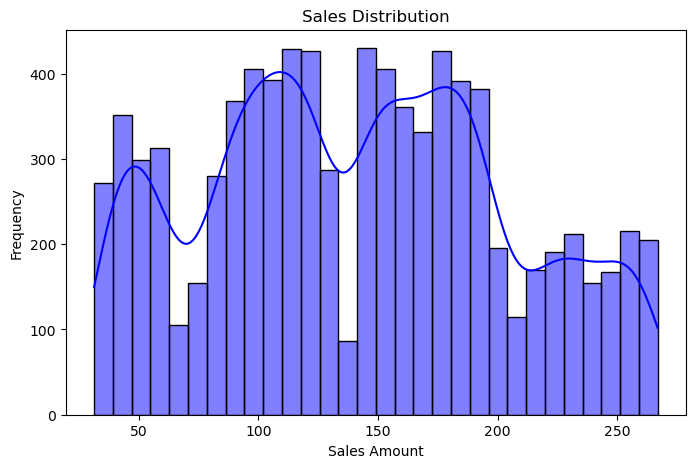

In [13]:
# Exploratory Data Analysis (EDA)
# Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], bins=30, kde=True, color="blue")
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

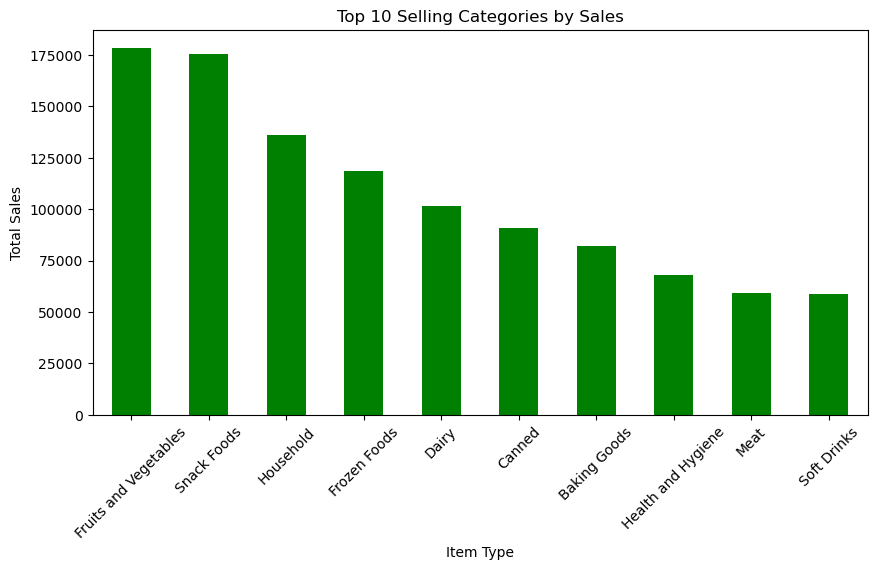

In [14]:
# Top 10 Selling Categories
top_categories = df.groupby("Item Type")["Sales"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
top_categories.plot(kind="bar", color="green")
plt.title("Top 10 Selling Categories by Sales")
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

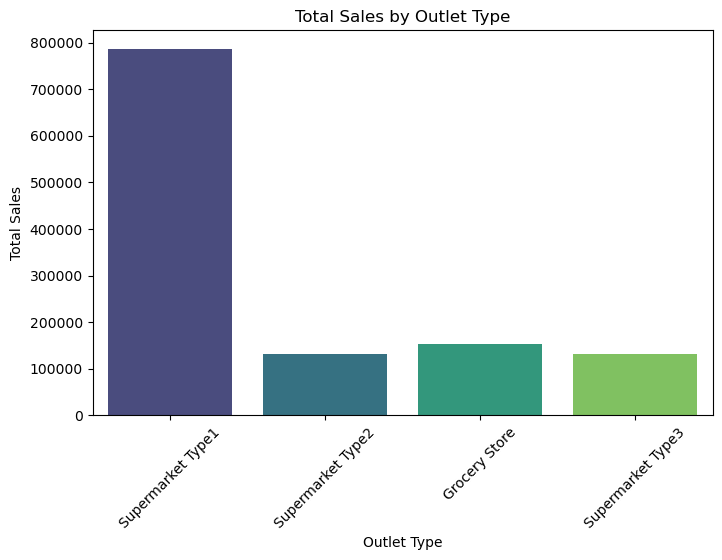

In [15]:
# Sales by Outlet Type
plt.figure(figsize=(8, 5))
sns.barplot(x="Outlet Type", y="Sales", data=df, estimator=sum, errorbar=None, palette="viridis")
plt.title("Total Sales by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

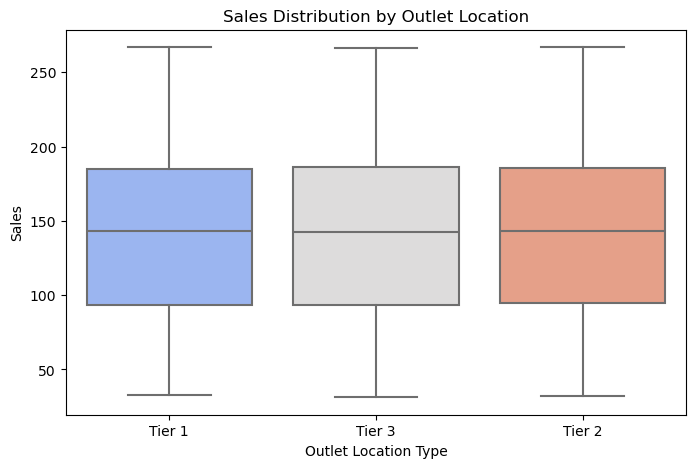

In [16]:
# Sales by Outlet Location
plt.figure(figsize=(8, 5))
sns.boxplot(x="Outlet Location Type", y="Sales", data=df, palette="coolwarm")
plt.title("Sales Distribution by Outlet Location")
plt.xlabel("Outlet Location Type")
plt.ylabel("Sales")
plt.show()

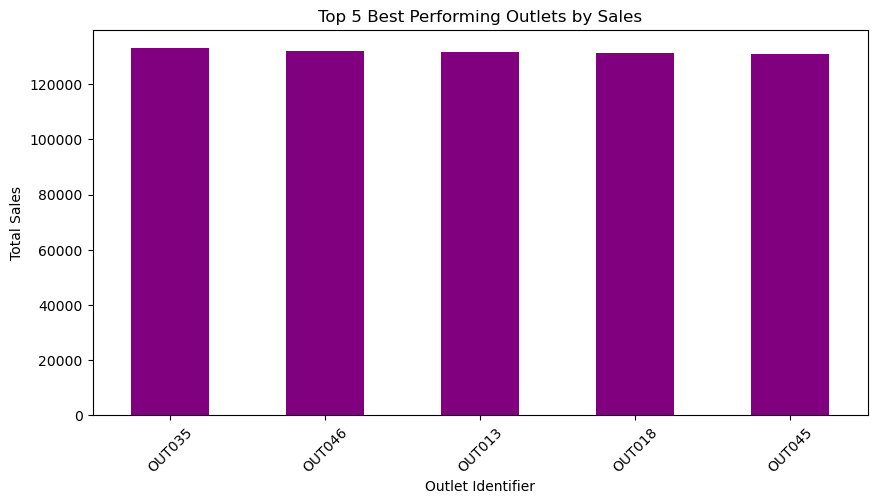

In [17]:
# Best-performing outlets by total sales
top_outlets = df.groupby("Outlet Identifier")["Sales"].sum().nlargest(5)
plt.figure(figsize=(10, 5))
top_outlets.plot(kind="bar", color="purple")
plt.title("Top 5 Best Performing Outlets by Sales")
plt.xlabel("Outlet Identifier")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

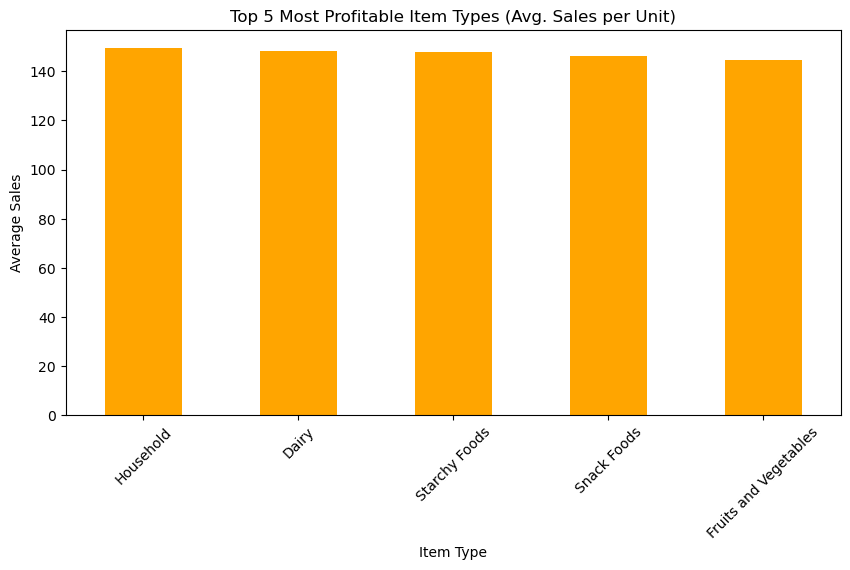

In [18]:
# Most Profitable Items (Avg. Sales per Unit)
top_items = df.groupby("Item Type")["Sales"].mean().nlargest(5)
plt.figure(figsize=(10, 5))
top_items.plot(kind="bar", color="orange")
plt.title("Top 5 Most Profitable Item Types (Avg. Sales per Unit)")
plt.xlabel("Item Type")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.show()
